In [81]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [127]:
#Reading data from excel file
fam_incidents = pd.read_excel("Resources/Data_Tables_Family_Incidents_Visualisation_Year_Ending_September_2022.xlsx","Table 02")
fam_incidents2 = pd.read_excel("Resources/Data_Tables_Family_Incidents_Visualisation_Year_Ending_September_2022.xlsx","Table 01")

#Create a new column to combine month and year
fam_incidents["MonYr"] = fam_incidents["Month"]+"-"+fam_incidents["Year"].map(str)

#Create a new column to convert above column into Date-Time format for sorting purpose
fam_incidents["MonYr2"]=pd.to_datetime(fam_incidents["MonYr"])

#Create a new column for labeling purpose
fam_incidents["MonYr3"]=fam_incidents["Month"].str[0:3]+"-"+fam_incidents["Year"].astype(str).str[2:4]

fam_incidents.head()


,Year,Year ending,Quarter,Month,Family Incident Count,MonYr,MonYr2,MonYr3
0,2022,September,Apr-Jun,April,7460,April-2022,2022-04-01,Apr-22
1,2022,September,Apr-Jun,June,7202,June-2022,2022-06-01,Jun-22
2,2022,September,Apr-Jun,May,7453,May-2022,2022-05-01,May-22
3,2022,September,Jan-Mar,February,7476,February-2022,2022-02-01,Feb-22
4,2022,September,Jan-Mar,January,7977,January-2022,2022-01-01,Jan-22


# Number of Family Incidents in each month from Jan-18 to Dec-22

<IPython.core.display.Javascript object>


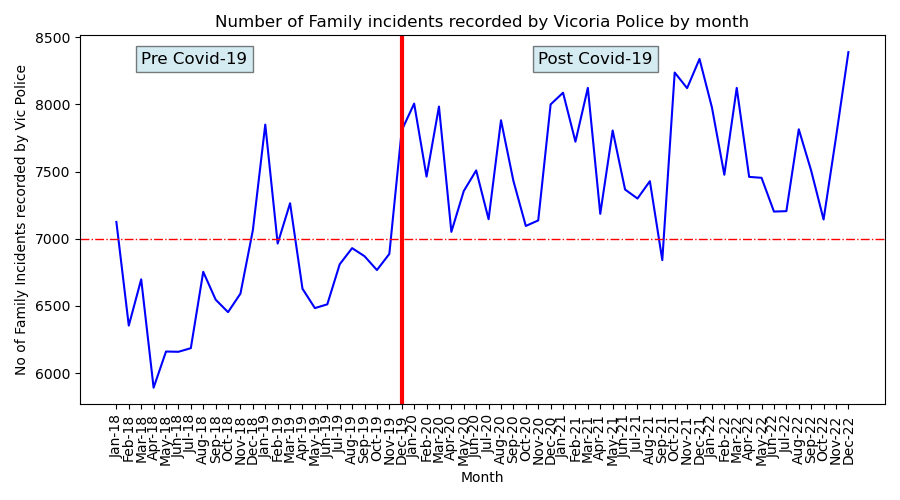

In [91]:
#Sort values by Month and year
sorted_fam = fam_incidents.sort_values(by="MonYr2")

#Create a line graph to show the trend of Number of Family Incidents over the period from 2018 to 2022
plt_1 = plt.figure(figsize=(9,5))
plt.text(2, 8300, 'Pre Covid-19', fontsize = 12, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
plt.text(34, 8300, 'Post Covid-19', fontsize = 12, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
plt.plot(sorted_fam["MonYr3"],sorted_fam["Family Incident Count"], color = "blue", label = "Number of Family Incidents")
plt.title("Number of Family incidents recorded by Vicoria Police by month")
plt.xlabel("Month")
plt.ylabel("No of Family Incidents recorded by Vic Police")
plt.xticks(rotation=90)
#plt.grid()
plt.tight_layout()
plt.axhline(7000,color='r', linestyle='dashdot', linewidth=1, label="No of Fam incidents = 7,000")
plt.axvline(23,color='r', linestyle='solid', linewidth=3, label="Pre-covid")

plt.show()

In [92]:
sorted_fam["Family Incident Count"].max()

8388

The Figure 1 indicates that there is an overall increasing trend of Family incidents in Victoria over the period from Jan-18 to Dec-22. The increasing trend is more obvious in Post Covid-19 period starting Jan-20. During the Pre Covid-19 period, the number of family incidents falls below the line of 7,000 in every month except five months namely Jan-18, Dec-18, Jan-19, Mar-19 and Dec-19. Within post Covid-19 period, only one month shows a less than 7,000 record of family incidents and all other months recorded above 7,000 family incidents with the highest of 8,388 in Dec-22. Also the line graph exhibit at a glance that there is a seasonal fluctuation. To explore more about the seasonal trend appearing in Figure 1, it is possible to plot five differnt line graphs for each year.

<IPython.core.display.Javascript object>


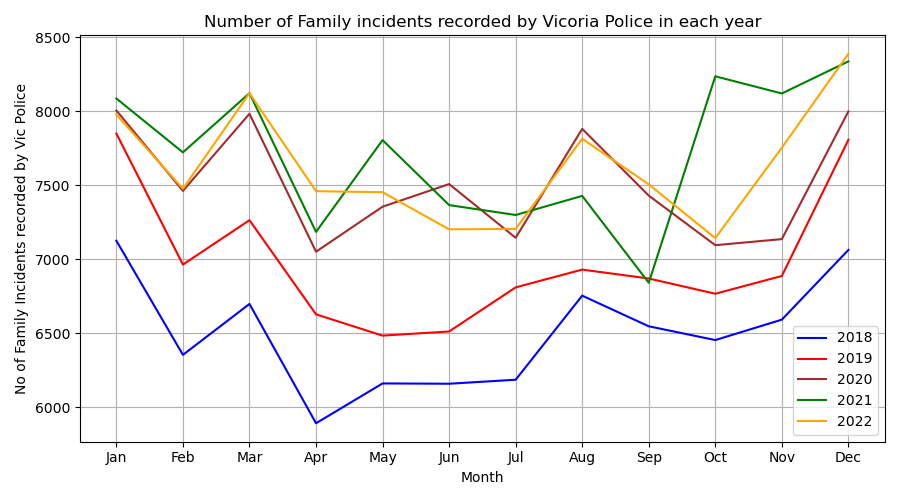

In [37]:
#Create list to store year
Unique_year=sorted_fam["Year"].unique()

Monthly_data=[]

for y in Unique_year:
    
    fam_by_year = sorted_fam.loc[sorted_fam["Year"]== y,:].copy()

    Monthly_data.append(fam_by_year["Family Incident Count"])
    


x_axis = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt_2 = plt.figure(figsize=(9,5))
plt.plot(x_axis, Monthly_data[0], color = "blue", label = "2018")
plt.plot(x_axis, Monthly_data[1], color = "red", label = "2019")
plt.plot(x_axis, Monthly_data[2], color = "brown", label = "2020")
plt.plot(x_axis, Monthly_data[3], color = "green", label = "2021")
plt.plot(x_axis, Monthly_data[4], color = "orange", label = "2022")

plt.title("Number of Family incidents recorded by Vicoria Police in each year")
plt.xlabel("Month")
plt.ylabel("No of Family Incidents recorded by Vic Police")
plt.grid()
plt.tight_layout()
plt.legend()

plt.show()



# Family Incident Count per 100,000 population

The actual trend of the number of family incidents can be affected by the changes in population over the time. Therefore it is more accurate to look at the family incident count per population to find out the actual trend of family incidents over the time.

<IPython.core.display.Javascript object>


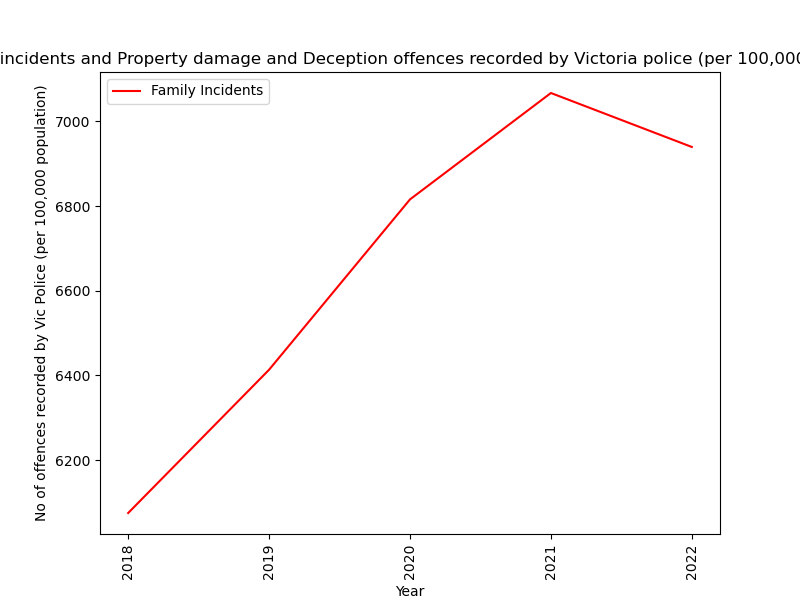

In [23]:
#Get the total of rate per population for each year
#Family incidents
Rate_per_pop_fam=fam_incidents2.groupby(["Year"]).sum()["Rate per 100,000 population"]

#Neha to edit - property damages and deception
#Rate_per_pop_prop=[]

#Create a bar chart to display the number of family incidents per 100,000 population against the year.
x_axis = np.arange(len(Rate_per_pop_fam))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.plot(x_axis,Rate_per_pop_fam, color = 'r', label = "Family Incidents")

#Neha to uncomment below line after added data into Rate_per_pop_prop series
#plt.plot(x_axis,Rate_per_pop_prop, color = 'b', label = "Property Damage and Deception")

plt.xticks(tick_locations, ["2018", "2019", "2020", "2021", "2022"], rotation="vertical")
plt.xlabel("Year")
plt.ylabel("No of offences recorded by Vic Police (per 100,000 population)")
plt.title("Number of Family incidents and Property damage and Deception offences recorded by Victoria police (per 100,000 population) by Year")
plt.legend()



<IPython.core.display.Javascript object>


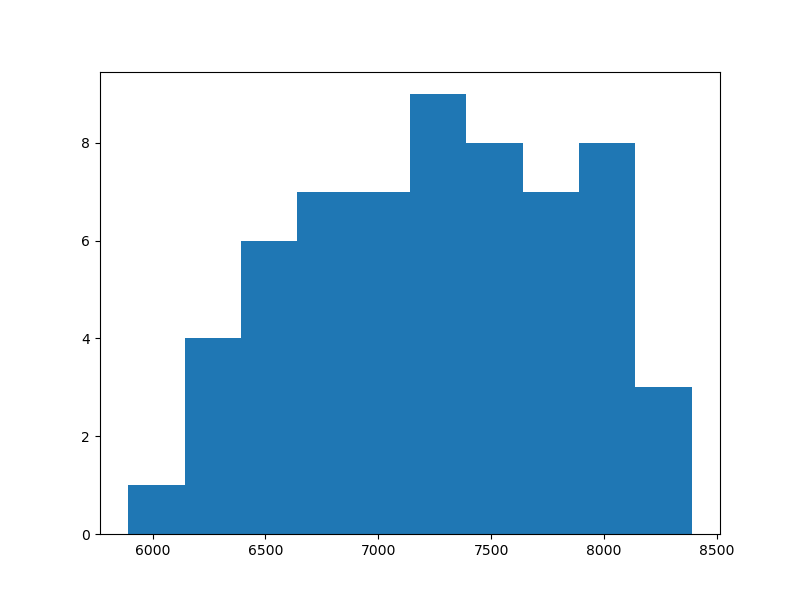

In [48]:
fam_incidents["Mean"]=fam_incidents["Family Incident Count"].mean()
fam_incidents["diff"]=fam_incidents["Family Incident Count"] - fam_incidents["Mean"]
fam_incidents

counts, bins_count = np.histogram(fam_incidents["Family Incident Count"], bins=10)
pdf = counts / sum(counts)
plt.figure(figsize=(8,6))
plt.hist(bins_count[:-1], bins_count, weights=counts)

plt.show()